<a href="https://colab.research.google.com/github/DanielAcostaRoa/PSO/blob/master/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Particle Swarm Optimization

**Output**: $x^{*}\in R^n$ donde $x^{*} = \arg\min{f(x)}$

**Input**: \\
- funcionObjetivo: Funcion $f:R^n\rightarrow R$ a minimizar (type: python function) \\
- dim: Dimension $n$ (type: int) \\
- num_particulas: Tamaño del enjambre de particulas (type: int) \\
- om: Hiperparametro del algoritmo que controla la velocidad (type: int) \\
- phi_p: Hiperparametro del algoritmo de memoria de su posicion (type: int) \\
- phi_g: Hiperparametro del algoritmo de memoria global (type: int) \\
- limInf: Limite inferior del espacio de busqueda (type: int) defalult = $-10^3$ \\
- limSup: Limite superior del espacio de busqueda (type: int) defalult = $10^3$ \\
- maxIt: Número máximo de iteraciones (type: int) defalult = $10^3$ \\
- flag: False para no mostrar grafico de primeras 10 iteraciones (type: bool) defalult = True \\

Particle Swarm Optimization es un metaheuristica para optimizacion de funciones $f:R^n\rightarrow R$, en este caso se minimiza la función y se devuelve el mejor vector solucion encontrado. Los últimos 3 paramentos de entrada son hiperparametros del algoritmo que mejoran la convergencia y solución, para cada problema en particular se debe encontrar los mejores hiperparametros.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def PSO_optimizer(funcionObjetivo, dim, num_particulas, om, phi_p, phi_g, limInf = -10**3, limSup = 10**3, maxIt = 10**3, flag=True):
  particulas_pos = [np.random.uniform(limInf,limSup,dim) for i in range(num_particulas)]
  particulas_posBest = np.copy(particulas_pos)
  particulas_eval = [funcionObjetivo(x) for x in particulas_pos]
  particulas_vel = [np.random.uniform(-np.abs(limSup-limInf),np.abs(limSup-limInf),dim) for i in range(num_particulas)]
  p_global_best = np.argmax(particulas_eval)
  mejores = []
  for iteracion in range(maxIt):
    for p_v in range(num_particulas):
      rp = np.random.uniform(0,1,dim)
      rg = np.random.uniform(0,1,dim)
      particulas_vel[p_v] = om*particulas_vel[p_v] + phi_p*rp*(particulas_posBest[p_v] - particulas_pos[p_v]) + phi_g*rg*(particulas_posBest[p_global_best] - particulas_pos[p_v])
      particulas_pos[p_v] = particulas_pos[p_v] + particulas_vel[p_v]
      if funcionObjetivo(particulas_pos[p_v])< funcionObjetivo(particulas_posBest[p_v]):
        particulas_posBest[p_v] = particulas_pos[p_v]
        if funcionObjetivo(particulas_posBest[p_v]) < funcionObjetivo(particulas_posBest[p_global_best]):
          p_global_best = p_v
    mejores.append(funcionObjetivo(particulas_posBest[p_global_best]))
  if flag:
    print("Funcion objetivo = ", funcionObjetivo(particulas_posBest[p_global_best]))
    plt.xlabel("Primeras iteraciones")
    plt.ylabel("f(best)")
    plt.plot(np.arange(0,20),mejores[0:20])
  return particulas_posBest[p_global_best]

##Ejemplos de usos

### Ejemplos de funciones a optimizar:

In [ ]:
def esfera(x):
  suma = 0 
  for i in x:
    suma+=i**2
  return suma

In [ ]:
def rosenbrock(x):
  suma = 0
  for i in range(len(x)-1):
    suma += 100*(x[i+1]-x[i]**2)**2 + (1-x[i])**2
  return suma

###Ejemplo de uso con la esfera, rapida convergencia

Funcion objetivo =  0.005119282583320175


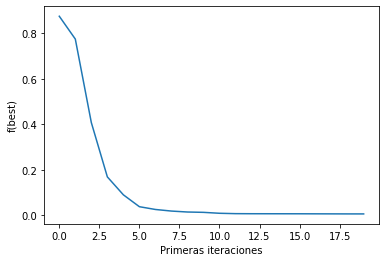

In [ ]:
x_best = PSO_optimizer(esfera,10 ,100,np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1),-1,1,100)

###Ejemplos de uso con la rosembrok, lenta convergencia

Funcion objetivo =  11.053024787559663


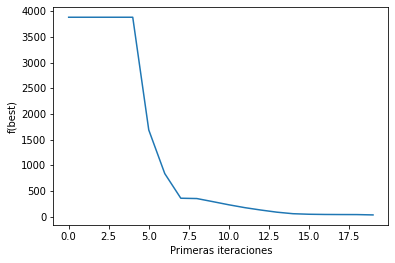

In [ ]:
#Hyperparametros aleatorios, correr varias veces para notar diferencias (aveces cae en minimo local).
x_best = PSO_optimizer(rosenbrock, 10 ,200,np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1),-3,3,1000)

Funcion objetivo =  0.002767893703170924
[0.99958565 0.99960156 0.99924193 0.99855206 0.99727462 0.99413152
 0.9886513  0.97727549 0.95502943 0.91202062]


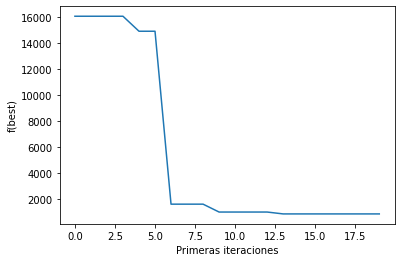

In [ ]:
#Convergencia a minimo global con hiperparametros fijados previamente a prueba y error
x_best = PSO_optimizer(rosenbrock, 10 ,200,0.9,0.4,0.9,-3,3,1000)
print(x_best)

Falta estudiar la relación entre hiperparametros y factores como velocidad de convergencia, facilidad para salir de minimos locales, etc. ver https://es.wikipedia.org/wiki/Optimizaci%C3%B3n_por_enjambre_de_part%C3%ADculas para detalles sobre la seleccion de hiperparametros